<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/classification_kpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AUC - ROC Curve
In classification, there are many different evaluation metrics. The most popular is  ***accuracy***, which measures how often the model is correct. This is a great metric because it is easy to understand and getting the most correct guesses is often desired. There are some cases where you might consider using another evaluation metric.

Another common metric is ***AUC***, area under the receiver operating characteristic (ROC) curve. The Reciever operating characteristic curve plots the true positive (TP) rate versus the false positive (FP) rate at different classification thresholds. The thresholds are different probability cutoffs that separate the two classes in binary classification. It uses probability to tell us how well a model separates the classes.

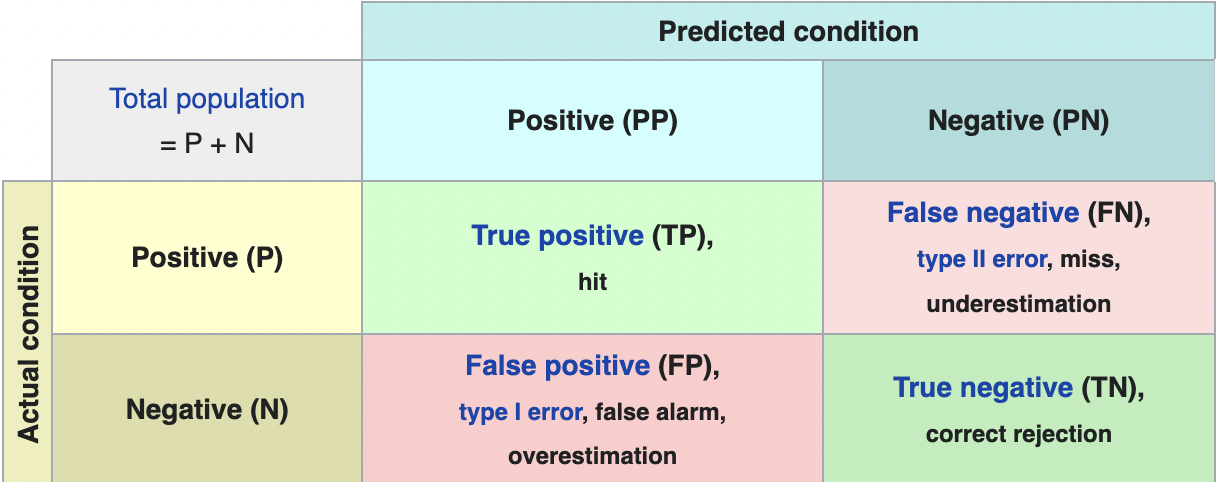

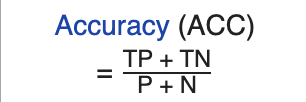

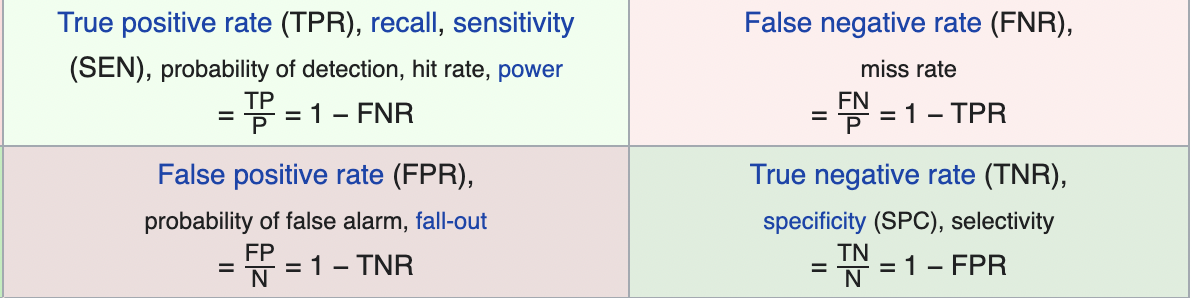

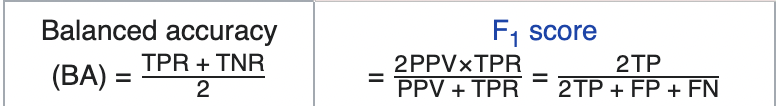

Sensitivity and Specificity are inversely proportional to each other. So when we increase Sensitivity, Specificity decreases, and vice versa.

When we decrease the threshold, we get more positive values thus it increases the sensitivity and decreasing the specificity.

Similarly, when we increase the threshold, we get more negative values thus we get higher specificity and lower sensitivity.

As we know FPR is 1 - specificity. So when we increase TPR, FPR also increases and vice versa.

# Imbalanced Data
Suppose we have an imbalanced data set where the majority of our data is of one value. We can obtain high accuracy for the model by predicting the majority class.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5

print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')


In [ ]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() +
    np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    print(fpr, tpr, thresholds)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')

In [ ]:
plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

An AUC score of around .5 would mean that the model is unable to make a distinction between the two classes and the curve would look like a line with a slope of 1. An AUC score closer to 1 means that the model has the ability to separate the two classes and the curve would come closer to the top left corner of the graph.

# Probabilities
Because AUC is a metric that utilizes probabilities of the class predictions, we can be more confident in a model that has a higher AUC score than one with a lower score even if they have similar accuracies.

In the data below, we have two sets of probabilites from hypothetical models. The first has probabilities that are not as "confident" when predicting the two classes (the probabilities are close to .5). The second has probabilities that are more "confident" when predicting the two classes (the probabilities are close to the extremes of 0 or 1).

In [ ]:
import numpy as np

n = 10000
y = np.array([0] * n + [1] * n)
#
y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1>.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2>.5)}')

print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

In [ ]:
plot_roc_curve(y, y_prob_1)

In [ ]:
fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)

Even though the accuracies for the two models are similar, the model with the higher AUC score will be more reliable because it takes into account the predicted probability. It is more likely to give you higher accuracy when predicting future data.